## CRISP-DM Phase 4. Modelling

In [1]:
# Dependencies
import sys
sys.path.append('../src')
import utils
import data_processor
import cross_validator
import deeplearning_build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load processed data
processed_data: pd.DataFrame = utils.load_preprocessed_data()

# Data preprocessing object
processor = data_processor.DataProcessor(processed_data)
X, y = processor.create_feature_matrix_and_target_vector(target_column="price actual")

# Target variable should be the last column (for compatibility with deeplearning_build module)
processed_data = processed_data.drop(columns=["price actual"])
processed_data["price actual"] = y

# Split data into train, validation and test sets (80%, 20%)
df_train, _ = train_test_split(processed_data, test_size=0.2, random_state=0, shuffle=False)

In [2]:
# List of models to test
models_to_test = ["LSTM", "GRU", "BiLSTM", "CNN-LSTM", "CNN-GRU", "CNN-BiLSTM", "CNN-BiLSTM-Attention", "TCN"]

# Perform cross-validation and evaluate models
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for model_name in models_to_test:
    
    print(f"Training and evaluating {model_name}...")
    
    # Initialize the TimeSeriesCrossValidator class
    tscv = cross_validator.TimeSeriesCrossValidator(model_name, df_train, n_splits=3)
    
    mae_scores, mse_scores, rmse_scores, r2_scores = tscv.validate()
    
    mae_list.append(mae_scores)
    mse_list.append(mse_scores)
    rmse_list.append(rmse_scores)
    r2_list.append(r2_scores)

# Evaluation dataframe
eval_df = pd.DataFrame({"Model": models_to_test, "MAE": mae_list, "MSE": mse_list, "RMSE": rmse_list, "R2": r2_list})
eval_df

Training and evaluating LSTM...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
467/467 [==============================] - 3s 4ms/step
Training and evaluating GRU...
467/467 [==============================] - 3s 4ms/step
Training and evaluating BiLSTM...
467/467 [==============================] - 5s 6ms/step
Training and evaluating CNN-LSTM...
467/467 [==============================] - 2s 3ms/step
Training and evaluating CNN-GRU...
467/467 [==============================] - 2s 3ms/step
Training and evaluating CNN-BiLSTM...
467/467 [==============================] - 3s 3ms/step
Training and evaluating CNN-BiLSTM-Attention...
467/467 [==============================] - 3s 3ms/step
Training and evaluating TCN...
467/467 [==============================] - 2s 2ms/step


,Model,MAE,MSE,RMSE,R2
0,LSTM,"[1.071492164110814, 2.783524838008513, 3.23348...","[2.079423293503264, 19.25153452955701, 18.1406...","[1.442020559320589, 4.387657066084017, 4.25918...","[0.9899406405561972, 0.8879039555431886, 0.844..."
1,GRU,"[5.156865336601263, 3.6709887512882293, 3.0772...","[40.48455478533444, 26.601357914234498, 16.789...","[6.362747424291997, 5.157650425749549, 4.09752...","[0.8041530602353205, 0.8451080876286801, 0.855..."
2,BiLSTM,"[0.971311100929146, 1.130557801098929, 1.05638...","[2.064414373334361, 5.298044480407736, 2.95735...","[1.4368070062935945, 2.3017481357454677, 1.719...","[0.9900132472848581, 0.9691510394302258, 0.974..."
3,CNN-LSTM,"[4.76059156193757, 3.579833748446457, 3.129520...","[36.72272170508386, 24.664896590234953, 18.123...","[6.059927532989471, 4.96637660575947, 4.257170...","[0.8223511977862736, 0.856383534494003, 0.8442..."
4,CNN-GRU,"[2.870413332240059, 3.149862788209228, 2.93828...","[13.713261549370268, 19.350968345906832, 15.95...","[3.703142118440807, 4.39897355594539, 3.994045...","[0.9336611129138633, 0.8873249815668052, 0.862..."
5,CNN-BiLSTM,"[0.6905620792070343, 1.1654674583887048, 0.952...","[1.2586127747487608, 5.697922966205172, 2.2591...","[1.1218791266213846, 2.3870322507677124, 1.503...","[0.9939113703586393, 0.9668226641803229, 0.980..."
6,CNN-BiLSTM-Attention,"[1.9425257491248578, 1.660137328045101, 1.3698...","[6.082205509603734, 7.560182410512624, 3.98593...","[2.466212786765111, 2.7495785878044336, 1.9964...","[0.970576894265186, 0.9559792731177192, 0.9657..."
7,TCN,"[3.0474278082946293, 2.8196442017864958, 2.562...","[14.577117469578093, 16.823470509271242, 12.12...","[3.8179991447848822, 4.10164241606594, 3.48254...","[0.9294821478920821, 0.9020418608589473, 0.895..."


C:\Users\Andre\AppData\Local\Temp\ipykernel_24352\1538110548.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')


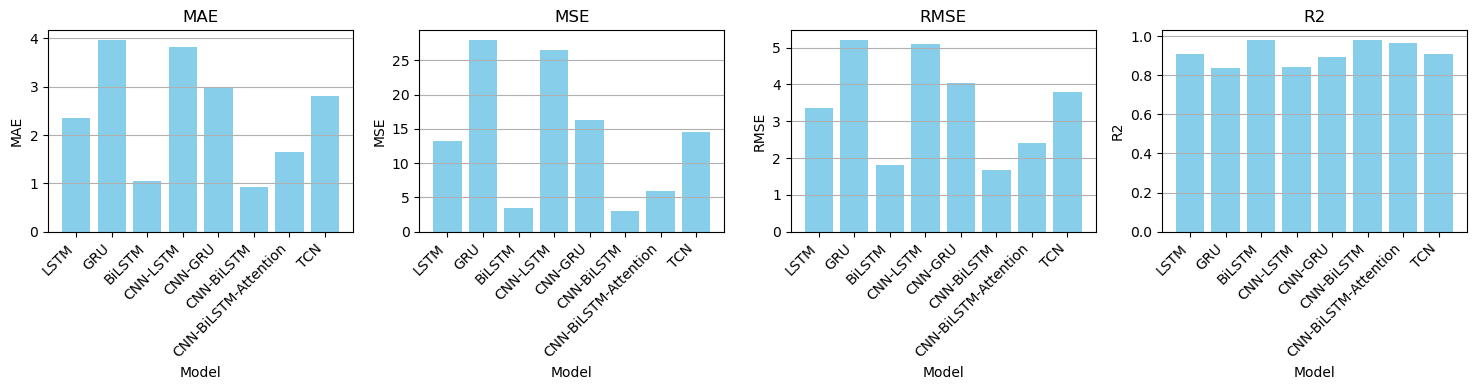

In [3]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 4))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(eval_df['Model'], eval_df[metric].apply(lambda x: np.mean(x)), color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')
    ax.yaxis.grid()

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Save the plot
plt.savefig('../plots/metrics_mean.png')

# Show the plot
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_20380\1442704344.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')


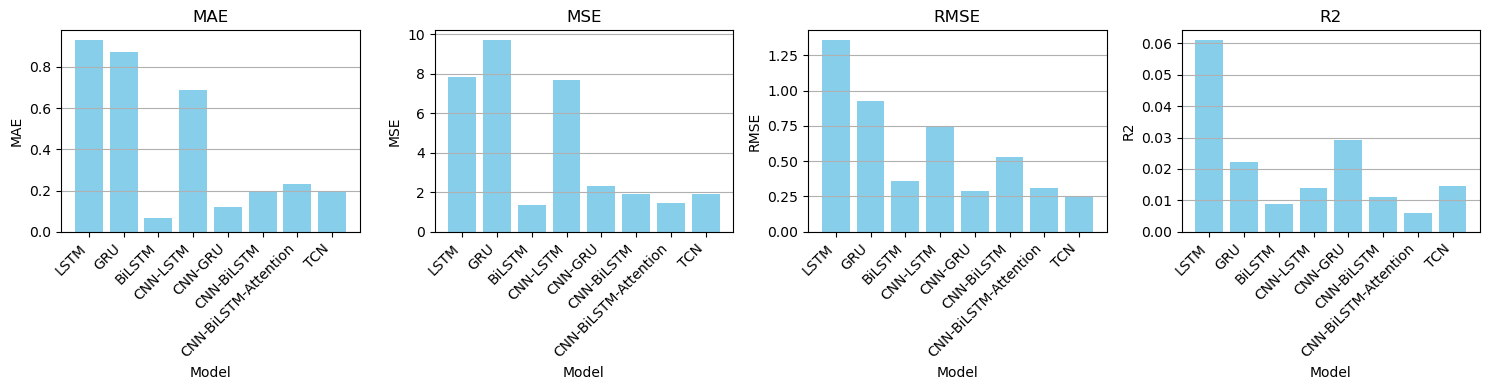

In [7]:
# plot standard deviation of each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 4))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(eval_df['Model'], eval_df[metric].apply(lambda x: np.std(x)), color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticklabels(eval_df['Model'], rotation=45, ha='right')
    ax.yaxis.grid()

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Save the plot
plt.savefig('../plots/metrics_std.png')

# Show the plot
plt.show()

In [4]:
# Get the model wit the lowest mean MAE, MSE, RMSE and highest R2 
best_model_mae = eval_df.iloc[eval_df["MAE"].apply(lambda x: np.mean(x)).idxmin()]
best_model_mse = eval_df.iloc[eval_df["MSE"].apply(lambda x: np.mean(x)).idxmin()]
best_model_rmse = eval_df.iloc[eval_df["RMSE"].apply(lambda x: np.mean(x)).idxmin()]
best_model_r2 = eval_df.iloc[eval_df["R2"].apply(lambda x: np.mean(x)).idxmax()]

print(f"Best model (MAE): {best_model_mae['Model']}")
print(f"Best model (MSE): {best_model_mse['Model']}")
print(f"Best model (RMSE): {best_model_rmse['Model']}")
print(f"Best model (R2): {best_model_r2['Model']}")

Best model (MAE): CNN-BiLSTM
Best model (MSE): CNN-BiLSTM
Best model (RMSE): CNN-BiLSTM
Best model (R2): CNN-BiLSTM


### Best Model Selection

- BiLSTM and hybrid CNN-BiLSTM have the best values of MAE, MSE and RMSE. However CNN-BiLSTM wins in all considered metrics, so CNN-BiLSTM is selected to proced to evaluation on test set.
- Note: Few epochs (50) were configured for model training to expedite the process, potentially leading to divergent results with a more extensive epoch range. 